In [1]:
# Import libliries
import pandas as pd
import os
import unicodedata
from bs4 import BeautifulSoup
df = pd.read_csv('bestofrt.tsv' , sep = '\t')

In [2]:
# check data
df

,ranking,critic_score,title,number_of_critic_ratings
0,1,99,The Wizard of Oz (1939),110
1,2,100,Citizen Kane (1941),75
2,3,100,The Third Man (1949),77
3,4,99,Get Out (2017),282
4,5,97,Mad Max: Fury Road (2015),370
...,...,...,...,...
95,96,100,Man on Wire (2008),156
96,97,97,Jaws (1975),74
97,98,100,Toy Story (1995),78
98,99,97,"The Godfather, Part II (1974)",72


In [3]:
#
with open ('rt_html/et_the_extraterrestrial.html') as file:
    soup = BeautifulSoup(file, 'lxml')

In [4]:
soup

<!DOCTYPE html>
<html lang="en" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/">
<head prefix="og: http://ogp.me/ns# flixstertomatoes: http://ogp.me/ns/apps/flixstertomatoes#">
<script src="//cdn.optimizely.com/js/594670329.js"></script>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="width=device-width,initial-scale=1" name="viewport"/>
<meta content="VPPXtECgUUeuATBacnqnCm4ydGO99reF-xgNklSbNbc" name="google-site-verification"/>
<meta content="034F16304017CA7DCF45D43850915323" name="msvalidate.01"/>
<link href="https://staticv2-4.rottentomatoes.com/static/images/iphone/apple-touch-icon.png" rel="apple-touch-icon"/>
<link href="https://staticv2-4.rottentomatoes.com/static/images/icons/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="https://staticv2-4.rottentomatoes.com/static/styles/css/rt_main.css" rel="stylesheet"/>
<script id="jsonLdSchema" type="application/ld+json">{"@context":"http

In [5]:
#見やすくする
print(soup.prettify())

<!DOCTYPE html>
<html lang="en" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/">
 <head prefix="og: http://ogp.me/ns# flixstertomatoes: http://ogp.me/ns/apps/flixstertomatoes#">
  <script src="//cdn.optimizely.com/js/594670329.js">
  </script>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="width=device-width,initial-scale=1" name="viewport"/>
  <meta content="VPPXtECgUUeuATBacnqnCm4ydGO99reF-xgNklSbNbc" name="google-site-verification"/>
  <meta content="034F16304017CA7DCF45D43850915323" name="msvalidate.01"/>
  <link href="https://staticv2-4.rottentomatoes.com/static/images/iphone/apple-touch-icon.png" rel="apple-touch-icon"/>
  <link href="https://staticv2-4.rottentomatoes.com/static/images/icons/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="https://staticv2-4.rottentomatoes.com/static/styles/css/rt_main.css" rel="stylesheet"/>
  <script id="jsonLdSchema" type="application/ld+j

In [6]:
soup.find('title')

<title>E.T. The Extra-Terrestrial (1982) - Rotten Tomatoes</title>

In [7]:
soup.find('title').contents[0].replace(u'\xa0', u' ')

'E.T. The Extra-Terrestrial (1982) - Rotten Tomatoes'

In [8]:
soup.find('title').contents[0][ : - len(' - Rotten Tomatoes')].replace(u'\xa0', u' ')

'E.T. The Extra-Terrestrial (1982)'

In [9]:
# List of dictionaries to build file by file and later convert to a DataFrame
df_list = []
folder = 'rt_html'
for movie_html in os.listdir(folder):
    with open(os.path.join(folder, movie_html)) as file:
        soup = BeautifulSoup(file , 'lxml')
        title = soup.find('title').contents[0][ : - len(' - Rotten Tomatoes')].replace(u'\xa0', u' ')
        audience_score = soup.find('div', class_ = 'audience-score meter').find('span').contents[0][: -1]
        num_audience_ratings = soup.find('div' , class_ = 'audience-info hidden-xs superPageFontColor')
        num_audience_ratings = num_audience_ratings.find_all('div')[1].contents[2].strip().replace(',' , '')
        
        # Append to list of dictionaries
        df_list.append({'title': title,
                        'audience_score': int(audience_score),
                        'number_of_audience_ratings': int(num_audience_ratings)})
df_new = pd.DataFrame(df_list, columns = ['title', 'audience_score', 'number_of_audience_ratings'])

In [10]:
df_new.query('title.str.contains("Ã")', engine='python')

,title,audience_score,number_of_audience_ratings
23,Army of Shadows (L'ArmÃ©e des ombres) (1969),94,7011
66,RashÃ´mon (1951),93,47657
90,Tokyo Story (TÃ´kyÃ´ monogatari) (1953),93,11325


In [11]:
df_new.at[23,'title'] = "Army of Shadows (L'Armée des ombres) (1969)"

In [12]:
df_new.at[66,'title'] = "Rashômon (1951)"

In [13]:
df_new.at[90,'title'] = "Tokyo Story (Tôkyô monogatari) (1953)"

In [14]:
df_new

,title,audience_score,number_of_audience_ratings
0,12 Angry Men (Twelve Angry Men) (1957),97,103672
1,The 39 Steps (1935),86,23647
2,The Adventures of Robin Hood (1938),89,33584
3,All About Eve (1950),94,44564
4,All Quiet on the Western Front (1930),89,17768
...,...,...,...
95,Up (2009),90,1201878
96,Vertigo (1958),93,101454
97,The Wages of Fear (1953),95,8536
98,Wonder Woman (2017),90,112955


In [15]:
df_merged = pd.merge(df_new, df, on='title' , how = 'outer')
pd.set_option('display.max_rows', None)
df_merged

,title,audience_score,number_of_audience_ratings,ranking,critic_score,number_of_critic_ratings
0,12 Angry Men (Twelve Angry Men) (1957),97,103672,53,100,49
1,The 39 Steps (1935),86,23647,76,98,44
2,The Adventures of Robin Hood (1938),89,33584,34,100,45
3,All About Eve (1950),94,44564,7,100,64
4,All Quiet on the Western Front (1930),89,17768,56,100,40
5,Casablanca (1942),95,355952,16,97,74
6,Frankenstein (1931),87,41140,65,100,45
7,King Kong (1933),86,89669,32,98,54
8,Laura (1944),91,10481,19,100,60
9,M (1931),95,35778,45,100,51


In [16]:
sum(df_merged.duplicated())

0

In [17]:
df_merged.isnull().any()

title                         False
audience_score                False
number_of_audience_ratings    False
ranking                       False
critic_score                  False
number_of_critic_ratings      False
dtype: bool

In [18]:
df_merged.to_csv('bestofrt_edited.tsv', index=False)

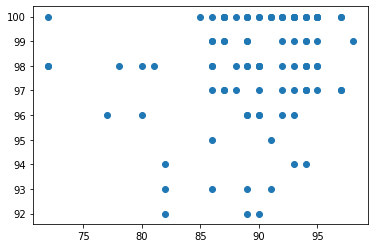

In [19]:
#Quick visualization
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df_merged.audience_score , df_merged.critic_score);

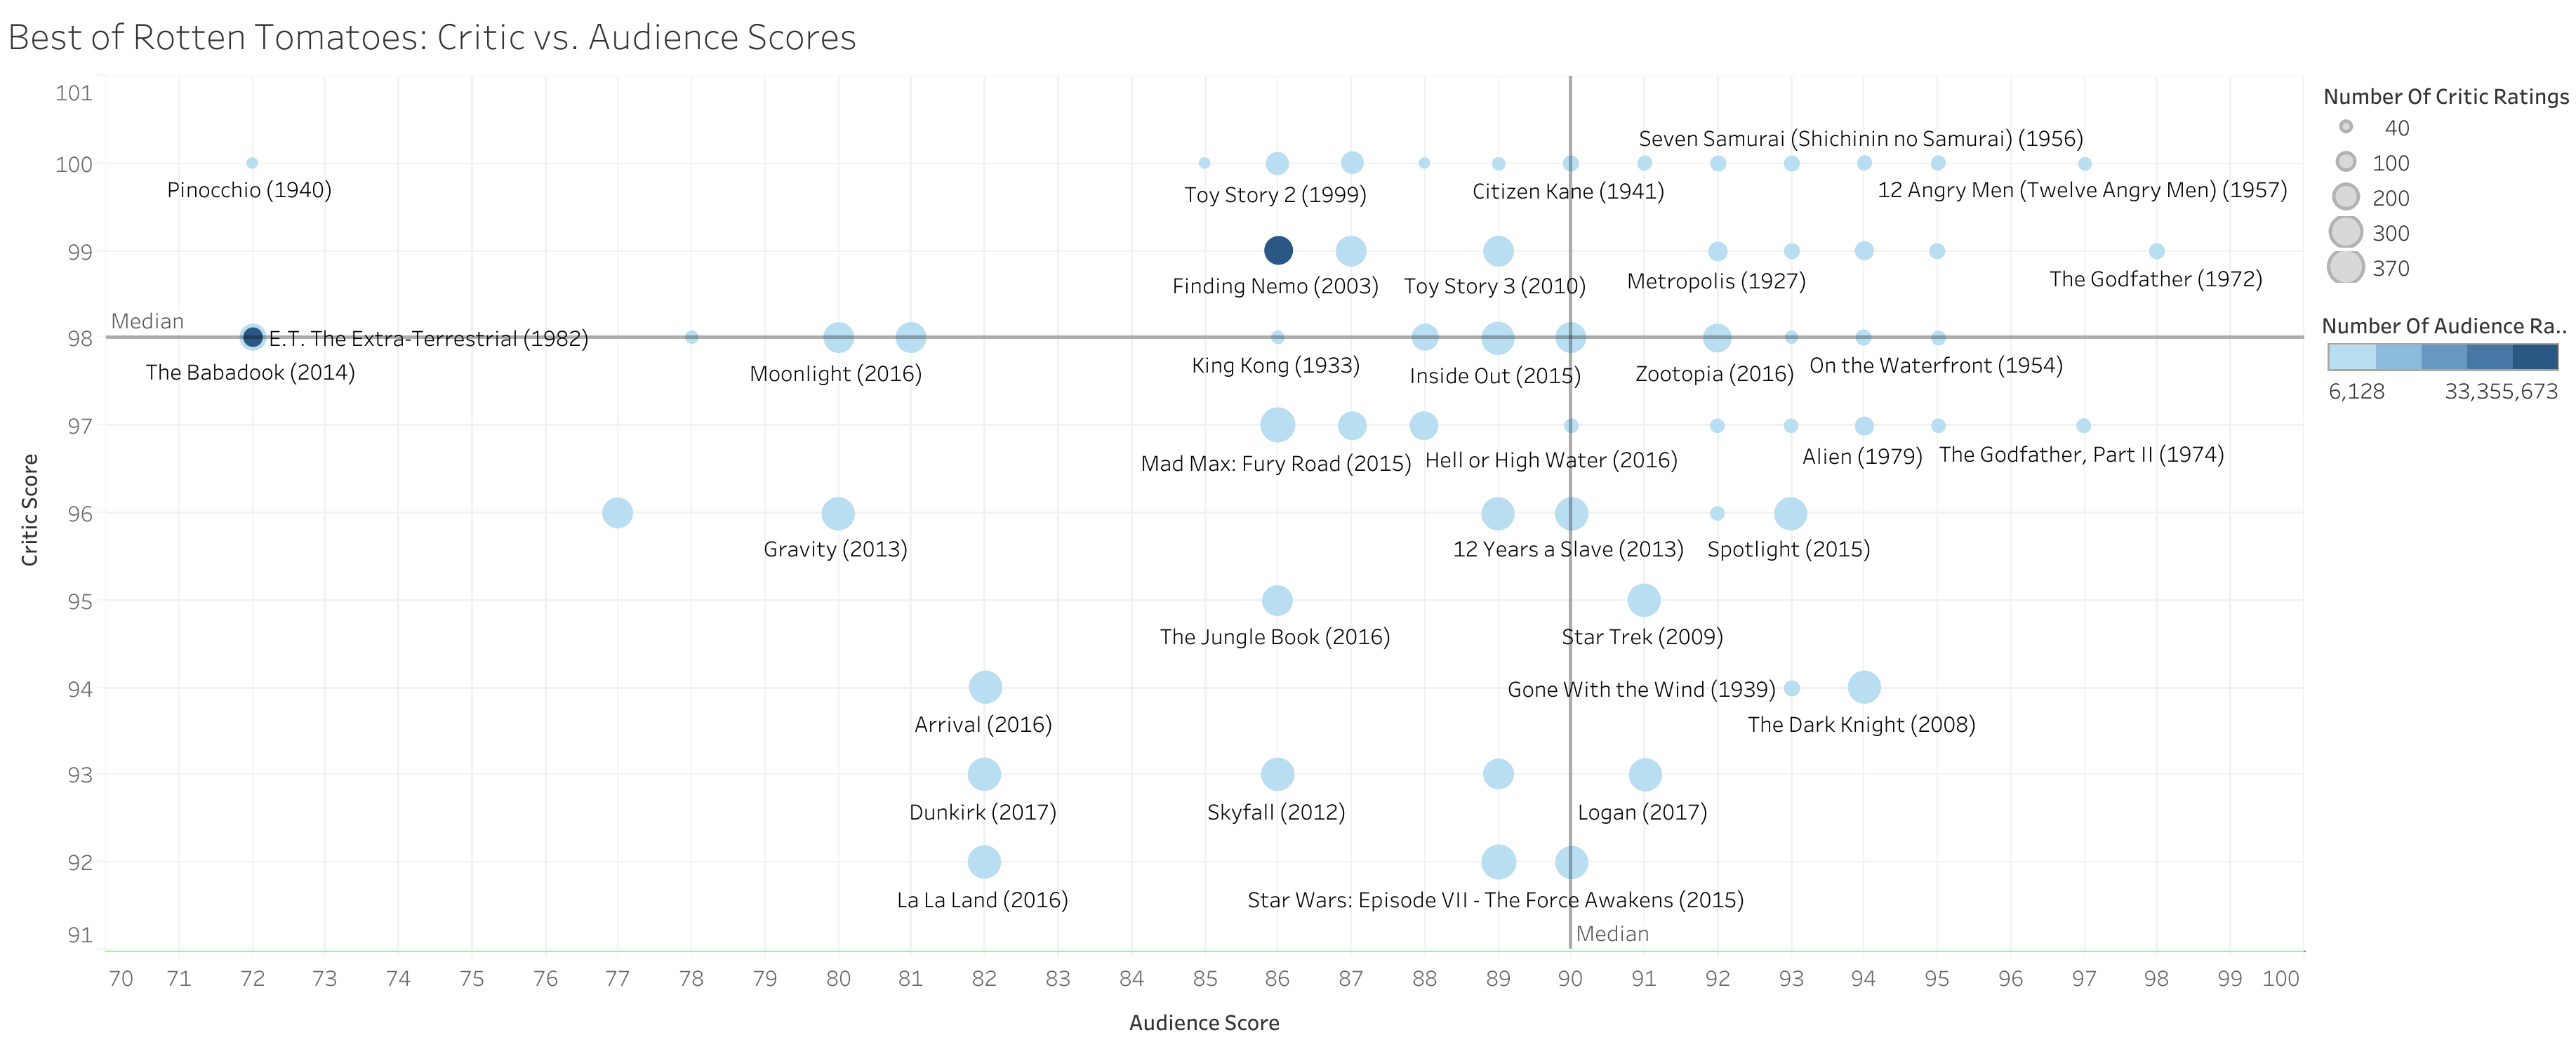

In [20]:
#Tableau image
from IPython.display import Image
file_name = "Best of Rotten Tomatoes_ Critic vs. Audience Scores.png"
Image(file_name)